# Import Data and fill missing values

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df.interpolate(method = "linear",inplace = True)

In [ ]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# Prepare data for Classification

In [ ]:
classification_data = df[['OverallQual','OverallCond','LotFrontage',	'LotArea','GarageArea','TotalBsmtSF','GrLivArea','SalePrice']]

classification_data

,OverallQual,OverallCond,LotFrontage,LotArea,GarageArea,TotalBsmtSF,GrLivArea,SalePrice
0,7,5,65.0,8450,548,856,1710,208500
1,6,8,80.0,9600,460,1262,1262,181500
2,7,5,68.0,11250,608,920,1786,223500
3,7,5,60.0,9550,642,756,1717,140000
4,8,5,84.0,14260,836,1145,2198,250000
...,...,...,...,...,...,...,...,...
1455,6,5,62.0,7917,460,953,1647,175000
1456,6,6,85.0,13175,500,1542,2073,210000
1457,7,9,66.0,9042,252,1152,2340,266500
1458,5,6,68.0,9717,240,1078,1078,142125


In [ ]:
def map_values(value):
    if value in [1, 2, 3, 4, 5]:
        return 0
    elif value in [6, 7, 8, 9,10]:
        return 1
    else:
        return None

In [ ]:
classification_data['OverallQual'] = classification_data['OverallQual'].apply(map_values)

classification_data

<ipython-input-8-edf6dbaab3f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_data['OverallQual'] = classification_data['OverallQual'].apply(map_values)


,OverallQual,OverallCond,LotFrontage,LotArea,GarageArea,TotalBsmtSF,GrLivArea,SalePrice
0,1,5,65.0,8450,548,856,1710,208500
1,1,8,80.0,9600,460,1262,1262,181500
2,1,5,68.0,11250,608,920,1786,223500
3,1,5,60.0,9550,642,756,1717,140000
4,1,5,84.0,14260,836,1145,2198,250000
...,...,...,...,...,...,...,...,...
1455,1,5,62.0,7917,460,953,1647,175000
1456,1,6,85.0,13175,500,1542,2073,210000
1457,1,9,66.0,9042,252,1152,2340,266500
1458,0,6,68.0,9717,240,1078,1078,142125


# Random Forest Classification from RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, log_loss, roc_auc_score, precision_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
X = classification_data[['OverallCond','LotFrontage',	'LotArea','GarageArea','TotalBsmtSF','GrLivArea','SalePrice']]
y = classification_data['OverallQual']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier()

In [ ]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_classifier.predict(X_test)

y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, rf_classifier.predict_proba(X_test))

print('accuracy:', accuracy, '\nprecision:', precision, '\nrecall:', recall, '\nf1:', f1, '\nroc_auc:', roc_auc, '\nlogloss:', logloss)

accuracy: 0.8595890410958904 
precision: 0.8809523809523809 
recall: 0.8757396449704142 
f1: 0.8783382789317508 
roc_auc: 0.856569009477077 
logloss: 0.3293168869753019


In [ ]:
y_pred1 = rf_classifier.predict(X_train)

accuracy2 = accuracy_score(y_train, y_pred1)
print('Accuracy in Training Data: ',accuracy2)

Accuracy in Training Data:  1.0


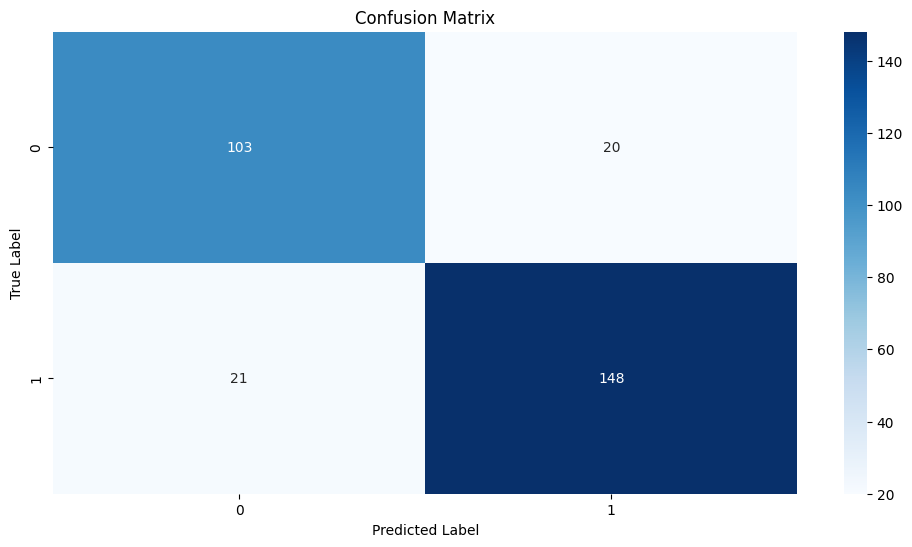

In [ ]:
confusionmatrix=confusion_matrix(y_test,y_pred)
class_label=np.unique(y_test)

plt.figure(figsize=(12,6))
sns.heatmap(confusionmatrix,annot=True,cmap='Blues',fmt='d',xticklabels=class_label,yticklabels=class_label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest Classification from scratch

In [ ]:
import numpy as np
from collections import Counter
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

class RandomForest:

    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(min_samples_split=self.min_samples_split, max_depth=self.max_depth)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

In [ ]:
X = classification_data[['OverallCond','LotFrontage',	'LotArea','GarageArea','TotalBsmtSF','GrLivArea','SalePrice']]
y = classification_data['OverallQual']

X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train1 = X_train1.values
y_train1 = y_train1.values
X_test1 = X_test1.values

In [ ]:
clf = RandomForest(n_trees = 3)
clf.fit(X_train1, y_train1)

In [ ]:
y_pred1 = clf.predict(X_test1)

y_pred1

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0])

In [ ]:
accuracy1 = accuracy_score(y_test1, y_pred1)
precision1 = precision_score(y_test1, y_pred1)
recall1 = recall_score(y_test1, y_pred1)
f11 = f1_score(y_test1, y_pred1)
roc_auc1 = roc_auc_score(y_test1, y_pred1)

print('accuracy:', accuracy1, '\nprecision:', precision1, '\nrecall:', recall1, '\nf1:', f11, '\nroc_auc:', roc_auc1)

accuracy: 0.8184931506849316 
precision: 0.8186813186813187 
recall: 0.8816568047337278 
f1: 0.8490028490028488 
roc_auc: 0.8066820609034492


In [ ]:
y_pred2 = clf.predict(X_train1)

accuracy2 = accuracy_score(y_train1, y_pred2)
print('Accuracy in Training Data: ',accuracy2)

Accuracy in Training Data:  0.9597602739726028


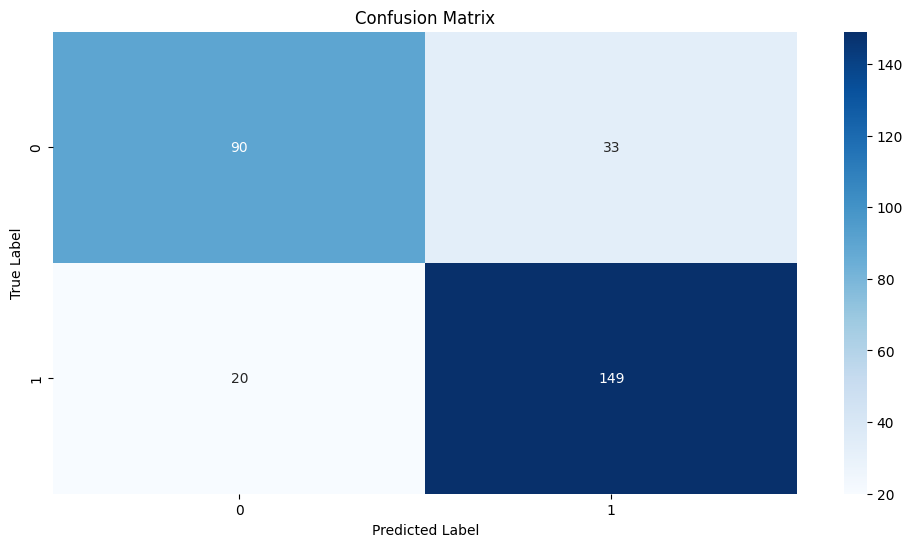

In [ ]:
confusionmatrix1=confusion_matrix(y_test1,y_pred1)
class_label=np.unique(y_test)

plt.figure(figsize=(12,6))
sns.heatmap(confusionmatrix1,annot=True,cmap='Blues',fmt='d',xticklabels=class_label,yticklabels=class_label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Preparation of data for Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.corr()['SalePrice']

<ipython-input-29-5ff461099641>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice']


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.310673
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.474279
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.467290
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [ ]:
regression_data= df[['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','YearBuilt','YearRemodAdd','SalePrice']]
regression_data.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,YearBuilt,YearRemodAdd,SalePrice
0,7,856,856,1710,2,8,2,548,2003,2003,208500
1,6,1262,1262,1262,2,6,2,460,1976,1976,181500
2,7,920,920,1786,2,6,2,608,2001,2002,223500
3,7,756,961,1717,1,7,3,642,1915,1970,140000
4,8,1145,1145,2198,2,9,3,836,2000,2000,250000


In [ ]:
columns_to_normalize = ['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','YearBuilt','YearRemodAdd','SalePrice']

data_to_normalize = regression_data[columns_to_normalize]

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_normalize)

regression_data[columns_to_normalize] = normalized_data

<ipython-input-31-1c246fdc6874>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data[columns_to_normalize] = normalized_data


In [ ]:
regression_data.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,YearBuilt,YearRemodAdd,SalePrice
0,0.666667,0.140098,0.119780,0.259231,0.666667,0.500000,0.50,0.386460,0.949275,0.883333,0.241078
1,0.555556,0.206547,0.212942,0.174830,0.666667,0.333333,0.50,0.324401,0.753623,0.433333,0.203583
2,0.666667,0.150573,0.134465,0.273549,0.666667,0.333333,0.50,0.428773,0.934783,0.866667,0.261908
3,0.666667,0.123732,0.143873,0.260550,0.333333,0.416667,0.75,0.452750,0.311594,0.333333,0.145952
4,0.777778,0.187398,0.186095,0.351168,0.666667,0.583333,0.75,0.589563,0.927536,0.833333,0.298709


# Random Forest Regression from RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X2 = regression_data[['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','YearBuilt','YearRemodAdd']]
y2 = regression_data['SalePrice']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor()

rf_regressor.fit(X_train2,y_train2)

RandomForestRegressor()

In [ ]:
y_pred2 = rf_regressor.predict(X_test2)

In [ ]:
mse = mean_squared_error(y_test2,y_pred2)

print("Mean Squared Error: ", mse)

Mean Squared Error:  0.0016765639166884106


In [ ]:
# X_test3 = ['0.666667','0.140098','0.119780','0.259231','0.666667','0.500000','0.50','0.386460','0.949275','0.883333']

# predicting the value of saleprice based on normalized values of the other independent variables

X_test3 = np.array(['0.666667', '0.140098', '0.119780', '0.259231', '0.666667', '0.500000', '0.50', '0.386460', '0.949275', '0.883333'], dtype=np.float32)
X_test3 = X_test3.reshape(1, -1)  # Reshape to 2D array


y_pred3 = rf_regressor.predict(X_test3)
y_pred3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.23172268])

# Random Forest Regression from scratch



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np

In [ ]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

class ForestRegressor:
    def __init__(self, n_estimators=10, min_samples_split=2, max_depth=100, max_features=None):
        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.max_features = max_features
        self.estimators = []

    def fit(self, X, y):
        self.estimators = []
        n_features = X.shape[1]
        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))
        else:
            self.max_features = min(self.max_features, n_features)

        for _ in range(self.n_estimators):
            estimator = DecisionTreeRegressor(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                max_features=self.max_features
            )
            X_sample, y_sample = bootstrap_sample(X, y)
            estimator.fit(X_sample, y_sample)
            self.estimators.append(estimator)

    def predict(self, X):
        predictions = np.zeros((len(X), self.n_estimators))
        for i, estimator in enumerate(self.estimators):
            predictions[:, i] = estimator.predict(X)
        return np.mean(predictions, axis=1)


In [ ]:
X3 = regression_data[['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','YearBuilt','YearRemodAdd']]
y3 = regression_data['SalePrice']

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
X_train3 = X_train3.values
y_train3 = y_train.values
X_test3 = X_test3.values

In [ ]:
rf = ForestRegressor()

rf.fit(X_train3,y_train3)

In [ ]:
y_pred3 = rf.predict(X_test3)

mse3 = mean_squared_error(y_test3,y_pred3)

print("Mean Squared Error: ", mse3)

Mean Squared Error:  0.3284930309621243


In [ ]:
y_pred4 = rf.predict(X_train3)
mse4 = mean_squared_error(y_train3,y_pred4)

print("Mean Squared Error of Training data: ", mse4)

Mean Squared Error of Training data:  0.00045376712328767124
